In [3]:
import seaborn as sns
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
import librosa
import os

In [4]:
meta_data_path = 'validated.tsv'
meta_data = pd.read_csv(meta_data_path,sep = '\t')
meta_data.head() 

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,0e0501c09d84645ee7418e6bebbb87d59030031307c156...,common_voice_en_41047776.mp3,f05b13340f4242fbc3911588673c38d8d065cde77b605d...,The new division adopted the Lazarus nameplate...,NaN,2,0,NaN,NaN,United States English,NaN,en,NaN
1,134c70ef63c6d0b17ddbae435da077843802a711bb510b...,common_voice_en_41074651.mp3,f084aae0f1294fc56cf64aa06b48f27952a79e3b5aa7a6...,He was subsequently assigned to minor posts in...,NaN,3,0,thirties,non-binary,"United States English,Maine",NaN,en,NaN
2,2ca636c915df1f93af996708934a5ea7eb437dfded2301...,common_voice_en_40884000.mp3,ee7ea141b3eb4ddfabc311da0550e6abd2f2e6457ae2a1...,The phrase originated in a comic strip of the ...,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
3,2e91e4bf7389040b3e898a756f0155ebde7eb41ea68470...,common_voice_en_41120986.mp3,f0ecf52a133a6f48f1a9bf503d995db0cf36139c11513c...,Gibson went on to manage the Department of Rec...,NaN,2,0,twenties,NaN,"India and South Asia (India, Pakistan, Sri Lanka)",NaN,en,NaN
4,38a6ab913e27c72c3f28f3d2da65caa00933288bfaaa24...,common_voice_en_40983032.mp3,efe4e03f95b62047b25b5cadab7793fd1e517ea9fbac73...,"On Sundays, four trains run each way, to Carli...",NaN,2,0,twenties,NaN,"India and South Asia (India, Pakistan, Sri Lanka)",NaN,en,NaN


In [5]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        137 non-null    object 
 1   path             137 non-null    object 
 2   sentence_id      137 non-null    object 
 3   sentence         137 non-null    object 
 4   sentence_domain  1 non-null      object 
 5   up_votes         137 non-null    int64  
 6   down_votes       137 non-null    int64  
 7   age              117 non-null    object 
 8   gender           91 non-null     object 
 9   accents          136 non-null    object 
 10  variant          0 non-null      float64
 11  locale           137 non-null    object 
 12  segment          0 non-null      float64
dtypes: float64(2), int64(2), object(9)
memory usage: 14.0+ KB


In [6]:
meta_data['age'].unique()

array([nan, 'thirties', 'twenties', 'fourties', 'fifties', 'sixties',
       'teens'], dtype=object)

In [11]:
meta_data['gender'].value_counts()

gender
male_masculine     57
female_feminine    30
non-binary          4
Name: count, dtype: int64

In [13]:
meta_data['age'].value_counts()

age
thirties    66
twenties    30
fourties     8
sixties      7
teens        4
fifties      2
Name: count, dtype: int64

__Ages didnt work out due to bad data spread I will work with genders instead__

In [16]:
meta_data['gender'].unique()

array([nan, 'non-binary', 'female_feminine', 'male_masculine'],
      dtype=object)

In [18]:
filtered_metadata = meta_data[
    (meta_data['gender'].isin(['female_feminine', 'male_masculine']))
] 

filtered_metadata.head() 

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
5,3a7e562f91be204271351929b01fc4358096dc524cb7b9...,common_voice_en_40869109.mp3,ee8ca1eb707ac794543eff0b85e3a10d3e1cf3f8086eb6...,There is a police station on the main road.,NaN,4,0,twenties,female_feminine,United States English,NaN,en,NaN
16,058fe5b1170aa09ef3f1092b179384639bc46ac53c1675...,common_voice_en_40953263.mp3,ef7d3c34147f1c5a00e31cd999a0d0a84ceeb7739d8957...,Switzerland has qualified a single athlete in ...,NaN,3,0,fifties,female_feminine,"United States English,Washington State",NaN,en,NaN
17,058fe5b1170aa09ef3f1092b179384639bc46ac53c1675...,common_voice_en_40953264.mp3,ef7d69e22a866a46a16f0b90ddd54922ac207a2537ebb5...,He was the son of Cherubino Bartoli.,NaN,3,0,fifties,female_feminine,"United States English,Washington State",NaN,en,NaN
20,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_40917961.mp3,eed75185fd41c53dad1796185f54719dd52377e960be22...,"The main type of crops grown are potatoes, car...",NaN,2,0,fourties,female_feminine,Scottish English,NaN,en,NaN
21,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_40929013.mp3,ef246e273a7bad578bd652a47a1338fd709721138610fd...,The park covers an area with four small island...,NaN,2,0,fourties,female_feminine,Scottish English,NaN,en,NaN


In [20]:
filtered_metadata.shape

(87, 13)

In [22]:
male= filtered_metadata[filtered_metadata['gender'] == 'male_masculine'][['client_id','path', 'age','gender','sentence']]
female= filtered_metadata[filtered_metadata['gender'] == 'female_feminine'][['client_id','path', 'age','gender','sentence']]

In [24]:
male.head()

,client_id,path,age,gender,sentence
26,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_40920578.mp3,sixties,male_masculine,Chlorogenic acid is freely soluble in ethanol ...
27,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_40963465.mp3,sixties,male_masculine,His writings during this period are considered...
51,9430e5e18fd4eaabcbe041177c7860fa75aec9407d276e...,common_voice_en_40867353.mp3,thirties,male_masculine,"The definite article, you might say."
52,9430e5e18fd4eaabcbe041177c7860fa75aec9407d276e...,common_voice_en_40867368.mp3,thirties,male_masculine,"In the spring quarter, first-year students com..."
53,9430e5e18fd4eaabcbe041177c7860fa75aec9407d276e...,common_voice_en_40867372.mp3,thirties,male_masculine,Did our first parents continue in the estate w...


In [26]:
female.head()

,client_id,path,age,gender,sentence
5,3a7e562f91be204271351929b01fc4358096dc524cb7b9...,common_voice_en_40869109.mp3,twenties,female_feminine,There is a police station on the main road.
16,058fe5b1170aa09ef3f1092b179384639bc46ac53c1675...,common_voice_en_40953263.mp3,fifties,female_feminine,Switzerland has qualified a single athlete in ...
17,058fe5b1170aa09ef3f1092b179384639bc46ac53c1675...,common_voice_en_40953264.mp3,fifties,female_feminine,He was the son of Cherubino Bartoli.
20,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_40917961.mp3,fourties,female_feminine,"The main type of crops grown are potatoes, car..."
21,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_40929013.mp3,fourties,female_feminine,The park covers an area with four small island...


__Preprocessing is done
Now it's time to implement mfccs on males and females then compare them with eachother__

In [29]:
# def mfcc(audio_path, sr=16000, n_mfcc=13):
#     y, _ = librosa.load(audio_path, sr=sr)
#     mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
#     np.savetxt('mfcc_features.csv', mfcc, delimiter=',')
#     return mfcc

#ValueError: setting an array element with a sequence.
# The requested array has an inhomogeneous shape after 1 dimensions.
# The detected shape was (57,) + inhomogeneous part.

def get_mfcc(file_path, output_file='mfcc_features_final.csv', n_mfcc=13, max_length=200):
    
    y, sr = librosa.load(file_path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_length:
        mfcc = np.pad(mfcc, ((0, 0), (0, max_length - mfcc.shape[1])), mode='constant')
    else:
        mfcc = mfcc[:, :max_length]

    mfcc = mfcc.T
    with open(output_file, 'a') as f:
        np.savetxt(f, mfcc, delimiter=',')


    return mfcc


In [42]:
def compute_mfcc_statistics(df, folder_path='Clips', output_file='mfcc_features.csv'):
    global mfccs
    global mfcc_list
    mfcc_list = []
    mfccs = []
    for path in df['path']:
        full_path = os.path.join(folder_path, path)
        mfcc = get_mfcc(full_path, output_file=output_file)  
        mfccs.append(mfcc)
        mfcc_list.append(mfccs)

    
    mfccs = np.array(mfccs)
    
    mean_mfcc = np.mean(mfccs, axis=0) 
    std_mfcc = np.std(mfccs, axis=0)    
    
    return mean_mfcc, std_mfcc
    
mean_mfcc_males, std_mfcc_males = compute_mfcc_statistics(male)
mean_mfcc_females, std_mfcc_females = compute_mfcc_statistics(female) 





In [48]:
mean_mfcc_males

array([[-6.1700690e+02,  7.7920828e+00,  5.1359034e+00, ...,
         3.3972493e-01, -8.6569629e-04, -4.7623610e-01],
       [-5.7223523e+02,  3.0706423e+01,  9.5291958e+00, ...,
         6.6936803e-01, -4.2785597e-01, -9.3652558e-01],
       [-5.4989911e+02,  3.8481606e+01,  8.1716557e+00, ...,
        -4.1240796e-01, -1.5375584e+00, -1.7751333e+00],
       ...,
       [-1.3246637e+02,  2.3424450e+01, -3.5210199e+00, ...,
        -4.1233516e+00, -1.6031466e-01, -8.3340794e-01],
       [-1.3362117e+02,  2.5668375e+01, -1.0398442e+00, ...,
        -4.2937703e+00, -2.0692697e-01, -5.4406309e-01],
       [-1.3135837e+02,  2.6298397e+01, -6.6587508e-01, ...,
        -4.0134106e+00,  3.8195446e-01, -3.9027297e-01]], dtype=float32)

In [50]:
mean_mfcc_females

array([[-5.78884949e+02,  8.99527264e+00,  8.41900635e+00, ...,
        -5.71420729e-01, -1.47934031e+00, -1.12081718e+00],
       [-5.50732361e+02,  3.16636105e+01,  2.17601395e+01, ...,
        -1.03091061e+00, -8.64069641e-01, -1.68824625e+00],
       [-5.23152039e+02,  4.42240715e+01,  2.70452881e+01, ...,
        -4.60035038e+00, -3.04859924e+00, -3.09051108e+00],
       ...,
       [-1.23667625e+02,  1.73365116e+01,  1.48546708e+00, ...,
        -6.46900272e+00,  1.41417837e+00, -2.49765563e+00],
       [-1.24745575e+02,  1.80508556e+01,  4.17508602e+00, ...,
        -6.58280754e+00,  2.24519396e+00, -2.09273362e+00],
       [-1.23539658e+02,  1.73540916e+01,  4.26085472e+00, ...,
        -5.97603512e+00,  1.53939009e+00, -2.50099635e+00]], dtype=float32)

__The last step is visualization__


In [53]:
def mfcc_implement(df, folder_path='Clips', output_file='mfcc_features.csv'):
    global mfccs
    mfccs = []
    for path in df['path']:
        full_path = os.path.join(folder_path, path)
        mfcc = get_mfcc(full_path, output_file=output_file)  
        mfccs.append(mfcc)
        mfcc_list.append(mfccs)

    
    mfccs = np.array(mfccs)
    return mfcc
    
mfcc_males= mfcc_implement(male,output_file='mfcc_features_male.csv')
mfcc_males= mfcc_implement(female,output_file='mfcc_features_female.csv')

In [73]:
df_male = pd.DataFrame(mfcc_data_male)
df_male.insert(0, 'Type', 'Male') 


df_female = pd.DataFrame(mfcc_data_female)
df_female.insert(0, 'Type', 'Female')  


combined_df = pd.concat([df_male, df_female], axis=0, ignore_index=True)

combined_df.to_csv('combined_mfcc.csv', index=False, header=False)

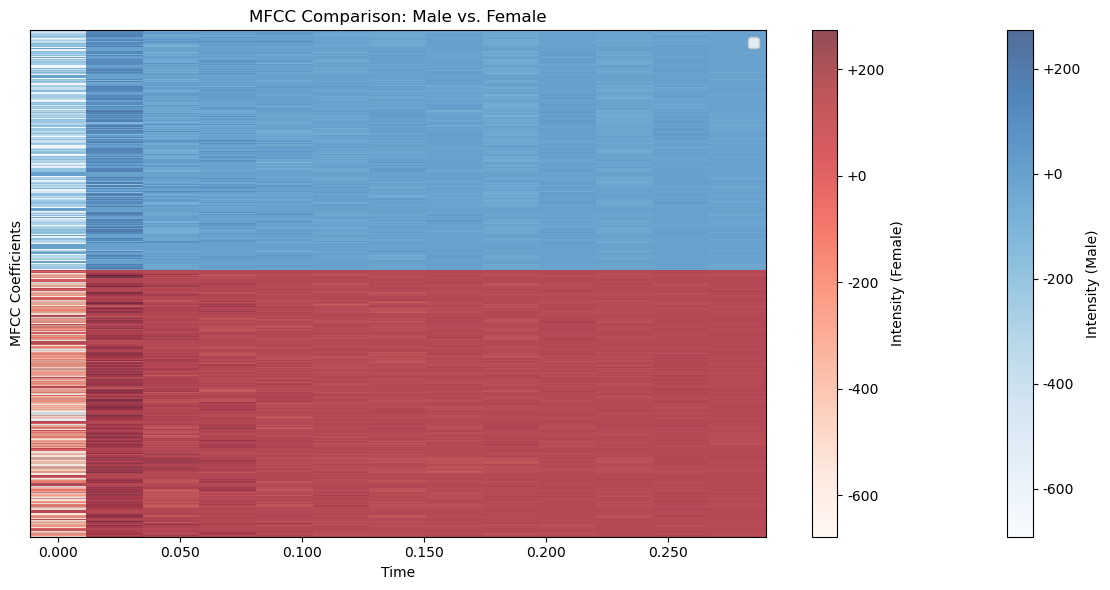

In [77]:
combined_data = pd.read_csv('combined_mfcc.csv', header=None)

male_data = combined_data[combined_data[0] == 'Male'].iloc[:, 1:].to_numpy()
female_data = combined_data[combined_data[0] == 'Female'].iloc[:, 1:].to_numpy()
plt.figure(figsize=(12, 6))

librosa.display.specshow(male_data, x_axis='time', cmap='Blues', alpha=0.7)
plt.colorbar(format="%+2.f", label='Intensity (Male)')

librosa.display.specshow(female_data, x_axis='time', cmap='Reds', alpha=0.7)
plt.colorbar(format="%+2.f", label='Intensity (Female)')
plt.title('MFCC Comparison: Male vs. Female')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')

plt.legend(['Male', 'Female'], loc='upper right')

plt.tight_layout()
plt.show()
